## Supervised Learning 1: Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

One of the very first things you might have learnt in your undergraduate Chemistry labs is the Gas laws- Boyle's law, Charles law, Gay-Lussac's law, Avogadro's law, and the ideal gas equation. Let us consider the Gay-Lussac's law. It says at a constant volume, for a given number of moles of a gas, the Pressure of the gas ($P$) is proportional to its absolute Temperature ($T$).
$$ P\varpropto T $$

Now, given a few pressure and temperature measurements, can we machine-learn this relation? Let's try. 

Let us first generate the data for it. We know there exists a linear relationship. We will hand-pick the slope and intercept for this relation. And since experiments always have human errors, we can hardly get a perfect straightline. We will introduce this human error in terms on noise. 

In [2]:
def GayLussac(m, slope, intercept):
    '''
    Parameters: 
    T: Temperature in K; P: Pressure in kPa; m: No. of data Points; slope; intercept; noise
    The noise is selected randomly from a normal distribution.
    Returns:
    m number of P,T pairs with P = slope*T +intercept + noise
    '''
    np.random.seed(123)
    T = np.random.uniform(200,3000, m)
    T.sort()
    noise = np.random.normal(0, 100, m) 
    P = slope * T + intercept + noise
    T = T.reshape(m,1)
    P = P.reshape(m,1)
    return T,P, noise

For any volume, the Presuse is supposed to go to $0$ at $0 K$. But we are just playing around here. So you can change no. of data points, the slope, the intercept while calling the function, and the temperature limits, and the normal distribution limit for the noise inside the function to generate the dataset of your choice.

In [3]:
slope = 1.3
intercept = 0.10
T,P, noise = GayLussac(20,slope,intercept)
d = {'Temperature': T[:,0], 'Pressure': P[:,0]}
df = pd.DataFrame(data=d)
df.iloc[:10] #only first 10 data are shown

,Temperature,Pressure
0,367.098111,577.732933
1,691.264917,937.363032
2,710.976845,998.106756
3,835.184070,1234.912494
4,1001.190138,1208.063792
5,1160.898445,1626.850883
6,1297.929051,1562.019699
7,1314.523915,1645.205939
8,1384.698088,1890.918034
9,1428.002285,1713.634901


<span style="color:red">Try calling df.describe() and see what you can learn about the data</span>


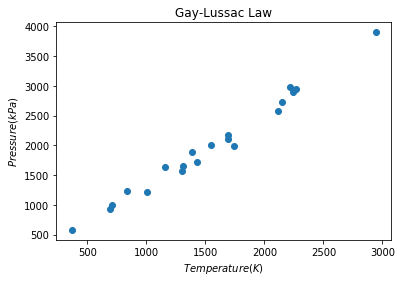

In [4]:
plt.scatter(T,P)
plt.xlabel('$Temperature (K)$')
plt.ylabel('$Pressure (kPa)$')
plt.title("Gay-Lussac Law")
plt.show()

In reality, we do not know the values of the slope and the intercept for the problem under study. The next step is to predict $P$ given $T$ by learning the $P-T$ relationship using ML. The $P-T$ curve is a straight line and a simple linear regression task using the [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) function in the scikit-learn library can give you the desired fit.
 
 

In [5]:
from sklearn import linear_model
m = len(P)
fit = linear_model.LinearRegression(fit_intercept=True).fit(T,P)
w = fit.coef_
b = fit.intercept_
print('Coefficient: \n', w)
print('Intercept:\n ', b)

Coefficient: 
 [[1.2585773]]
Intercept:
  [45.69461971]


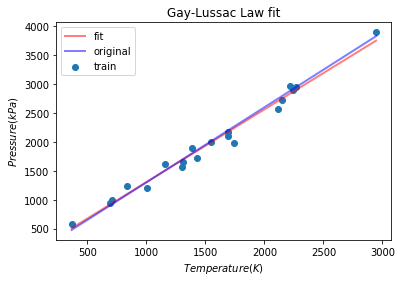

In [6]:
plt.scatter(T, P, label='train')
plt.plot(T, T.dot(w) + b, 'r-', lw=2.0, alpha=0.5, label='fit')
plt.plot(T, T.dot(slope) + intercept, 'b-', lw=2.0, alpha=0.5, label='original')
plt.xlabel('$Temperature (K)$')
plt.ylabel('$Pressure (kPa)$')
plt.legend()
plt.title("Gay-Lussac Law fit")
plt.show()

The linear-regression parameters 𝑤 and 𝑏 do not coincide with the originally specified slope and intercept and such variation is expected based on the data. For a considerable large dataset,the noise will average out, and the predicted $w$ and $b$ will be very close to the exact ones. Now we will evaluate the performance of this model based on the noise. 

In [7]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
m = len(P)
P_pred = fit.predict(T)
print("Mean squared error: %.2f"
      % mean_squared_error(P, P_pred))
print('r_2 statistic: %.2f' % r2_score(P, P_pred))
print("Mean absolute error: %.2f"
      % mean_absolute_error(P, P_pred))

Mean squared error: 11312.20
r_2 statistic: 0.98
Mean absolute error: 87.70


In the plot above, we have used all the data we have about $P$ and $T$ to determine the relationship between the two. In other words, the whole set is used as the training set. Now if you are given a different $T$ value in the range $200 K< T < 3000 K$, can you predict the pressure at that $T$ for the same ideal gas with same no. of moles and constant volume?

This is an example of univariate linear regression where the number of features (usually specified by $n$) is just 1 ($T$ in this case). If we had a non-linear dependence of $P$ on $T$, then we will require to perform a polynomial regression ($P = aT + bT^2 +c$ etc.).